In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats  as stats
import random
import seaborn as sns
import math
from scipy.optimize import minimize, show_options
import matplotlib.mlab as mlab 
from numpy import random 


In [2]:
dataset = pd.read_csv(r"C:\Users\Michal\Documents\GitHub\ProbabilityAndStatistics\Assignment_3\bigcity.csv")

In [3]:
# Data exploration
dataset.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [5]:
# 1.Excercise - 1. Point
u, x = dataset["u"], dataset["x"]

# Estimating the E(.) for both samples
mean_u = u.mean()
mean_x = x.mean()
theta = mean_x/mean_u

mean_u, mean_x, theta

(103.14285714285714, 127.79591836734694, 1.2390185991294025)

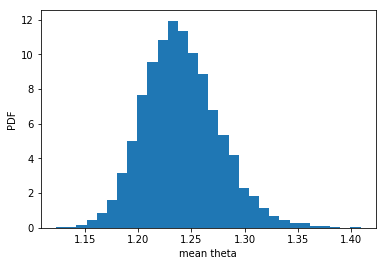

bias is 0.0018933909644165414
standard error is 0.03542458557318678


In [7]:
# 1.Excercise - 2. Point

#Set up array of indices to sample from: inds
bs_t_list = []
bs_t_diff_sqrt = []

def pair_bootstrap(data, function):   
    inds = np.arange(len(data))
    
    u = data["u"]
    x = data["x"]
      
    # Initialize replicates: bs_u, bs_x    
    for i in range(10000):
    
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_u, bs_x = function(u[bs_inds]), function(x[bs_inds])
        bs_t = bs_x/bs_u
        bs_t_list.append(bs_t)
        #std
        diff_sqrt = (bs_t - theta)**2
        bs_t_diff_sqrt.append(diff_sqrt)

    return bs_t_list, bs_t_diff_sqrt
    
pair_bootstrap(data = dataset,function = np.mean)
    
_ = plt.hist(bs_t_list, bins=30, density=True)
_ = plt.xlabel('mean theta')
_ = plt.ylabel('PDF')
plt.show()

bias_t = np.mean(bs_t_list) - theta
#standard error is the approx of the standard error of the boostraped values
ste = (sum(bs_t_diff_sqrt)/len(bs_t_diff_sqrt))**(1/2)

print("bias is", bias_t)
print("standard error is", ste)

In [8]:
# 1. Exercise - 3. point
#z = stats.norm.ppf(0.90)
#(bs_replicates_t - z*np.sqrt((bs_replicates_t * (1 - bs_replicates_t ) / len(bs_replicates_t)) ), 
#bs_replicates_t + z*np.sqrt((bs_replicates_t * (1 - bs_replicates_t ) / len(bs_replicates_t)) ) )

## Compute and print 95% CI for slope
print(np.percentile(bs_t_list, [5, 95]))

[1.18698597 1.3025212 ]


In [4]:
# 2. Exercise - 1. point
def inverseFunction(mu, n, a):
    u = stats.exponweib.rvs(size = n, a=a, c=mu ,loc = 0, scale = 1)
    return mu * (-1 * np.log(1 - a))**(1/u)

(array([347.,  33.,  20.,  25.,  19.,  21.,  14.,  10.,   9.,   2.]),
 array([0.        , 0.08671485, 0.17342971, 0.26014456, 0.34685942,
        0.43357427, 0.52028912, 0.60700398, 0.69371883, 0.78043368,
        0.86714854]),
 <a list of 10 Patch objects>)

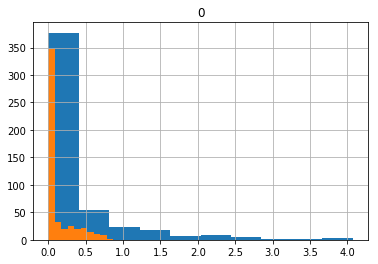

In [6]:
# 2. Exercise - 2. point
random.seed(40)
weibull_theoretical = stats.exponweib.rvs(size = 500, a=0.3, c =1, loc = 0) #here we should use min, because it gives us positive outputs
pd.DataFrame(weibull_theoretical).hist()
plt.hist(inverseFunction(1, 500, 0.3))

[0.02250189 2.47194932 0.15211076 0.33564994 1.14525952]
[-0.00480919  2.82730718  0.25703222  0.09928851  0.7045492 ]
[-2.45777303e-03  2.99933606e+00  2.99812076e-01  9.98261948e-02
  1.10086726e-01]
[-2.34738556e-03  3.00009462e+00  3.00000000e-01  9.99722362e-02
  9.98576195e-02]


D:\Users\aleks\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
D:\Users\aleks\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


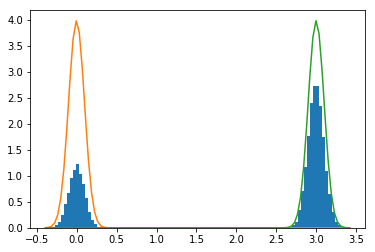

In [146]:
#3. Exercise - 1. point

import numpy as np
from numpy import random 
from scipy.optimize import minimize, show_options
import matplotlib.pyplot as plt 
import math 
import matplotlib.mlab as mlab 

def gaussian(x, mean, dev):
    # standard deviation, square root of variance
    return 1/math.sqrt(2*math.pi)/dev*math.exp(-(x-mean)**2/2/dev**2)

# Generate data 
N = 10000
a = 0.3

sample1 = random.normal(0, 0.1, size = int(N*a))
sample2 = random.normal(3, 0.1, size = int(N*(1-a)))

sample = np.concatenate([sample1, sample2])

max_iter = 100 

# initial values 
params = np.array([-1, 1, 0.5, 1, 1])

counter = 0 
converged = False 
tol = 0.1

plabel1 = np.zeros(sample.shape)
plabel2 = np.zeros(sample.shape)

while not converged and counter < max_iter:
    counter += 1
    
    mu1, mu2, pi_1, d1, d2 = params
    
    # Expectation step 
    for i in range(len(sample)):

        cdf1 = gaussian(sample[i], mu1, d1)
        cdf2 = gaussian(sample[i], mu2, d2)
        
        pi_2 = 1 - pi_1
        
        plabel1[i] = cdf1 * pi_1 / (cdf1 * pi_1 + cdf2 * pi_2)
        plabel2[i] = cdf2 * pi_2 / (cdf1 * pi_1 + cdf2 * pi_2)
        
    # Maximization 
    mu1 = sum(sample * plabel1)/sum(plabel1)
    mu2 = sum(sample * plabel2)/sum(plabel2)
    d1 = math.sqrt((sum(plabel1 * ((sample-mu1)**2)))/(sum(plabel1)))
    d2 = math.sqrt((sum(plabel2 * ((sample-mu2)**2)))/(sum(plabel2)))
    pi_1 = sum(plabel1)/len(sample)
    
    new_parameters = np.array([mu1, mu2, pi_1, d1, d2])
    print(new_parameters)
    
    # Checking the convergence 
    if np.max(abs(np.asarray(params) - np.asarray(new_parameters))) < tol:
        converged = True
    
    params = new_parameters
    

plt.hist(sample, bins = 100, density = True)

x = np.linspace(sample.min(), sample.max(), 100)

plt.plot(x, mlab.normpdf(x, mu1, 0.1))
plt.plot(x, mlab.normpdf(x, mu2, 0.1))

plt.show()

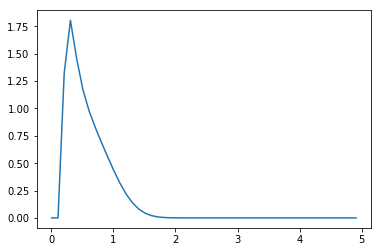

In [147]:
#4. Exercise - 1. point
from math import sqrt, pi, cosh, sinh, exp
def f(x,d=1.5):
        return d/(x*sqrt(2*pi))*cosh(d*np.log(2*x))*exp((-sinh(d*np.log(2*x))**2)/2)
    
f2 = np.vectorize(f)
x = np.arange(0.01, 5, 0.1)
plt.plot(x, f2(x, 1.5))
plt.show()

(0, 2)

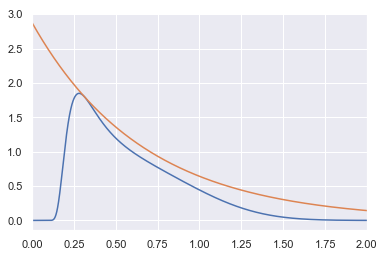

In [148]:
#4. Exercise - 2. point


sns.set()


# Envelope 
def g(x): 
    out = stats.expon.pdf(x, scale = (1/1.5))
    return out


range_of_values = np.arange(0.0001, 2, 0.0001) 
alpha = 1 / max(f2(range_of_values)/g(range_of_values))

def AR_simple_alg(iterations):
    generated_samples = []
    
    for i in range(iterations):
        y = stats.expon.rvs(scale = (0.66))
        u = np.random.uniform(0, 1)
        
        ratio = f(y)/(g(y) / alpha)
        
        if u <= ratio:
            generated_samples.append(y)
            
    return generated_samples

plt.plot(range_of_values, f2(range_of_values))
plt.plot(range_of_values, 1/ alpha * g(range_of_values))
plt.xlim(0,2)


In [8]:
#4. Exercise - 3. point - Generate a sample using your function and, with these data, estimate E(X^2). Using the
                          #bootstrap, give a measure of precision of your estimate.

In [149]:
sample = AR_simple_alg(iterations=100000)


D:\Users\aleks\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


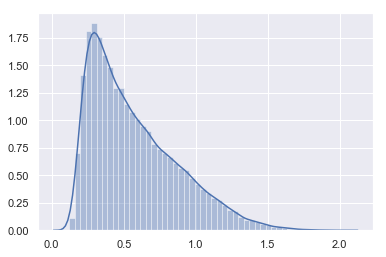

In [150]:
sns.set()
sns.distplot(sample)

In [152]:
len(sample)/100000 * 100 # observed acceptance ratio 

52.215999999999994

In [153]:
alpha

0.5216551236475129

In [154]:
sample_estimate = np.std(sample)
sample_estimate

0.3042753782321376

In [155]:
bs_sample = np.random.choice(sample, size = 100)

In [156]:
def bootstrap_replicate(data, function):
    bs_sample = np.random.choice(data, len(data))
    return function(bs_sample)

bs_results = np.empty(10000)

for i in range(10000):
    bs_results[i] = bootstrap_replicate(sample, np.std)

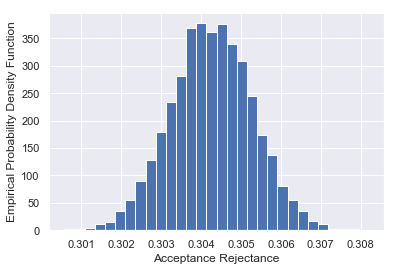

In [157]:
_ = plt.hist(bs_results, bins = 30, density=True)
_ = plt.xlabel("Acceptance Rejectance")
_ = plt.ylabel("Empirical Probability Density Function")
plt.show()

In [ ]:
print(np.percentile(bs_results, [10, 90]))